### Лабораторна робота №2: Групи та підгрупи

**Мета роботи:** Попрацювати з деякими групами та підгрупами в Sage, познайомитися з графами Келі груп



---
### 1. Приклади груп

Для кожної з груп $G$= $S_3$, $D_4$, $\mathbb{Z}_{14}$, $\mathbb{Z}_{14}^{*}$ виконайте наступні кроки:
1. Створіть групу.
2. Знайдіть порядок групи.     # G.order()
3. Побудуйте таблицю Келі групи.    # G.cayley_table(names='elements')
4. Виберіть довільні два елементи в групі.
5. Виконайте групову операцію над обраними елементами.
6. Знайдіть обернені для обраних елементів.
7. Визначте, чи є група абелевою. Якщо ні, то знайдіть два елементи групи, які не комутують.   # G.is_abelian()

Порядок групи: 6


a = (2,3)
b = (1,2)
a * b = (1,2,3)
Обернений до a: (2,3)
Обернений до b: (1,2)
Чи абелева: False


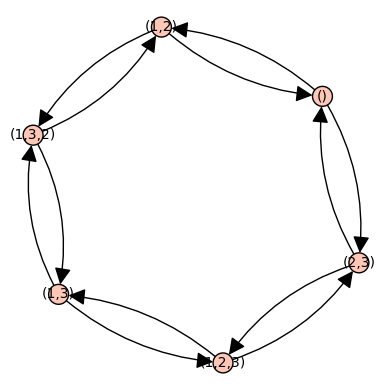

In [2]:
G = SymmetricGroup(3)
print("Порядок групи:", G.order())
G.cayley_table(names='elements')
a, b = G.random_element(), G.random_element()
print("a =", a)
print("b =", b)
print("a * b =", a * b)
print("Обернений до a:", a.inverse())
print("Обернений до b:", b.inverse())
print("Чи абелева:", G.is_abelian())
G.cayley_graph().show()


Порядок групи: 8
a = (1,4,3,2)
b = (2,4)
a * b = (1,2)(3,4)
Обернений до a: (1,2,3,4)
Обернений до b: (2,4)
Чи абелева: False


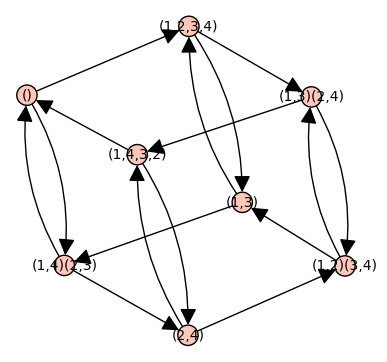

In [3]:
G = DihedralGroup(4)
print("Порядок групи:", G.order())
G.cayley_table(names='elements')
a, b = G.random_element(), G.random_element()
print("a =", a)
print("b =", b)
print("a * b =", a * b)
print("Обернений до a:", a.inverse())
print("Обернений до b:", b.inverse())
print("Чи абелева:", G.is_abelian())
G.cayley_graph().show()


In [6]:
Z4_star = [1, 3]
def cayley_table_mod_mult(elements, n):
    print("Таблиця Келі для Z_{}^*:".format(n))
    print("   ", end="")
    for e in elements:
        print("{:>3}".format(e), end="")
    print()
    for a in elements:
        print("{:>3}".format(a), end="")
        for b in elements:
            print("{:>3}".format((a * b) % n), end="")
        print()

cayley_table_mod_mult(Z4_star, 4)


Таблиця Келі для Z_4^*:
     1  3
  1  1  3
  3  3  1


In [11]:
Z11_star = [i for i in range(1, 11) if gcd(i, 11) == 1]
print("Елементи групи Z_11^*:", Z11_star)
print("Порядок групи:", len(Z11_star))
def cayley_table_mod_mult(elements, n):
    print("   ", end="")
    for e in elements:
        print("{:>4}".format(e), end="")
    print()
    for a in elements:
        print("{:>4}".format(a), end="")
        for b in elements:
            print("{:>4}".format((a * b) % n), end="")
        print()

cayley_table_mod_mult(Z11_star, 11)
a, b = Z11_star[2], Z11_star[4] 
print("a =", a)
print("b =", b)
print("a * b mod 11 =", (a * b) % 11)

def mod_inverse(x, n):
    return inverse_mod(x, n)

print("Обернений до a:", mod_inverse(a, 11))
print("Обернений до b:", mod_inverse(b, 11))


Елементи групи Z_11^*: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Порядок групи: 10
      1   2   3   4   5   6   7   8   9  10
   1   1   2   3   4   5   6   7   8   9  10
   2   2   4   6   8  10   1   3   5   7   9
   3   3   6   9   1   4   7  10   2   5   8
   4   4   8   1   5   9   2   6  10   3   7
   5   5  10   4   9   3   8   2   7   1   6
   6   6   1   7   2   8   3   9   4  10   5
   7   7   3  10   6   2   9   5   1   8   4
   8   8   5   2  10   7   4   1   9   6   3
   9   9   7   5   3   1  10   8   6   4   2
  10  10   9   8   7   6   5   4   3   2   1
a = 3
b = 5
a * b mod 11 = 4
Обернений до a: 4
Обернений до b: 9


---
### 2. Ізоморфні групи

1. Створіть групи $D_3$, $S_3$, $\mathbb{Z}_7^{*}$, $SL_2(\mathbb{Z}_2)$, $D_{12}$, $A_4$, $SL_2(\mathbb{Z}_3)$.
2. Перевірте, які з них ізоморфні.   % G.is_isomorphic(H)

In [42]:
G_D3 = DihedralGroup(3)
print("Група D3, порядок:", G_D3.order())

G_S3 = SymmetricGroup(3)
print("Група S3, порядок:", G_S3.order())

G_Z7_star = CyclicPermutationGroup(6)
print("Група Z7^*, порядок:", G_Z7_star.order())

F2 = GF(2)
M2 = MatrixSpace(F2, 2, 2)
SL2_Z2_matrices = [M for M in M2 if M.determinant() == 1]
G_SL2_Z2 = MatrixGroup(SL2_Z2_matrices)
print("Група SL(2, Z2), порядок:", G_SL2_Z2.order())

G_D12 = DihedralGroup(12)
print("Група D12, порядок:", G_D12.order())

G_A4 = AlternatingGroup(4)
print("Група A4, порядок:", G_A4.order())

F3 = GF(3)
M3 = MatrixSpace(F3, 2, 2)
SL2_Z3_matrices = [M for M in M3 if M.determinant() == 1]
G_SL2_Z3 = MatrixGroup(SL2_Z3_matrices)
print("Група SL(2, Z3), порядок:", G_SL2_Z3.order())

Група D3, порядок: 6
Група S3, порядок: 6
Група Z7^*, порядок: 6
Група SL(2, Z2), порядок: 6
Група D12, порядок: 24
Група A4, порядок: 12
Група SL(2, Z3), порядок: 24


In [43]:
print("\nІЗОМОРФНІ")

print("D3 ≅ S3:", G_D3.is_isomorphic(G_S3))
print("D3 ≅ Z7*:", G_D3.is_isomorphic(G_Z7_star))
print("D3 ≅ SL2(Z2):", G_D3.is_isomorphic(G_SL2_Z2))
print("D3 ≅ D12:", G_D3.is_isomorphic(G_D12))
print("D3 ≅ A4:", G_D3.is_isomorphic(G_A4))
print("D3 ≅ SL2(Z3):", G_D3.is_isomorphic(G_SL2_Z3))

print("\nS3 ≅ Z7*:", G_S3.is_isomorphic(G_Z7_star))
print("S3 ≅ SL2(Z2):", G_S3.is_isomorphic(G_SL2_Z2))
print("S3 ≅ D12:", G_S3.is_isomorphic(G_D12))
print("S3 ≅ A4:", G_S3.is_isomorphic(G_A4))
print("S3 ≅ SL2(Z3):", G_S3.is_isomorphic(G_SL2_Z3))

print("\nZ7* ≅ SL2(Z2):", G_Z7_star.is_isomorphic(G_SL2_Z2))
print("Z7* ≅ D12:", G_Z7_star.is_isomorphic(G_D12))
print("Z7* ≅ A4:", G_Z7_star.is_isomorphic(G_A4))
print("Z7* ≅ SL2(Z3):", G_Z7_star.is_isomorphic(G_SL2_Z3))

print("\nSL2(Z2) ≅ D12:", G_SL2_Z2.is_isomorphic(G_D12))
print("SL2(Z2) ≅ A4:", G_SL2_Z2.is_isomorphic(G_A4))
print("SL2(Z2) ≅ SL2(Z3):", G_SL2_Z2.is_isomorphic(G_SL2_Z3))

print("\nD12 ≅ A4:", G_D12.is_isomorphic(G_A4))
print("D12 ≅ SL2(Z3):", G_D12.is_isomorphic(G_SL2_Z3))

print("\nA4 ≅ SL2(Z3):", G_A4.is_isomorphic(G_SL2_Z3))


ІЗОМОРФНІ
D3 ≅ S3: True
D3 ≅ Z7*: False


TypeError: right must be a permutation group

---
### 3. Підгрупи і гратка підгруп

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:
1. Створіть групу.
2. Знайдіть усі її підгрупи.   % G.subgroups()
3. Побудуйте гратку підгруп.   % G.subgroup_lattice() може не працювати, запитайте Gemini or ChatGpt
4. Вкажіть групу, яка сама не абелева, але всі її власні підгрупи є абелевими.

In [45]:
G_Z24 = CyclicPermutationGroup(24)
print("Група ℤ₂₄, порядок:", G_Z24.order())

subs_Z24 = G_Z24.subgroups()
print("Кількість підгруп:", len(subs_Z24))

edges_Z24 = [(H1, H2) for H1 in subs_Z24 for H2 in subs_Z24 if H1.is_subgroup(H2) and H1 != H2]
DiGraph(edges_Z24).plot()

print("ℤ₂₄ абелева?", G_Z24.is_abelian())


Група ℤ₂₄, порядок: 24
Кількість підгруп: 8
ℤ₂₄ абелева? True


In [46]:
G_Q8 = QuaternionGroup()
print("Група ℚ₈, порядок:", G_Q8.order())

subs_Q8 = G_Q8.subgroups()
print("Кількість підгруп:", len(subs_Q8))

edges_Q8 = [(H1, H2) for H1 in subs_Q8 for H2 in subs_Q8 if H1.is_subgroup(H2) and H1 != H2]
DiGraph(edges_Q8).plot()

print("ℚ₈ абелева?", G_Q8.is_abelian())

print("Власні підгрупи абелеві:")
for H in subs_Q8:
    if H.order() < G_Q8.order():
        print(f"  Порядок {H.order()} — абелева:", H.is_abelian())


Група ℚ₈, порядок: 8
Кількість підгруп: 6
ℚ₈ абелева? False
Власні підгрупи абелеві:
  Порядок 1 — абелева: True
  Порядок 2 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True


In [47]:
G_D8 = DihedralGroup(8)
print("Група D₈, порядок:", G_D8.order())

subs_D8 = G_D8.subgroups()
print("Кількість підгруп:", len(subs_D8))

edges_D8 = [(H1, H2) for H1 in subs_D8 for H2 in subs_D8 if H1.is_subgroup(H2) and H1 != H2]
DiGraph(edges_D8).plot()

print("D₈ абелева?", G_D8.is_abelian())

print("Власні підгрупи абелеві:")
for H in subs_D8:
    if H.order() < G_D8.order():
        print(f"  Порядок {H.order()} — абелева:", H.is_abelian())


Група D₈, порядок: 16
Кількість підгруп: 19
D₈ абелева? False
Власні підгрупи абелеві:
  Порядок 1 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 8 — абелева: False
  Порядок 8 — абелева: True
  Порядок 8 — абелева: False


In [48]:
G_S4 = SymmetricGroup(4)
print("Група S₄, порядок:", G_S4.order())

subs_S4 = G_S4.subgroups()
print("Кількість підгруп:", len(subs_S4))

edges_S4 = [(H1, H2) for H1 in subs_S4 for H2 in subs_S4 if H1.is_subgroup(H2) and H1 != H2]
DiGraph(edges_S4).plot()

print("S₄ абелева?", G_S4.is_abelian())

print("Власні підгрупи абелеві:")
for H in subs_S4:
    if H.order() < G_S4.order():
        print(f"  Порядок {H.order()} — абелева:", H.is_abelian())


Група S₄, порядок: 24
Кількість підгруп: 30
S₄ абелева? False
Власні підгрупи абелеві:
  Порядок 1 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 2 — абелева: True
  Порядок 3 — абелева: True
  Порядок 3 — абелева: True
  Порядок 3 — абелева: True
  Порядок 3 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 4 — абелева: True
  Порядок 6 — абелева: False
  Порядок 6 — абелева: False
  Порядок 6 — абелева: False
  Порядок 6 — абелева: False
  Порядок 8 — абелева: False
  Порядок 8 — абелева: False
  Порядок 8 — абелева: False
  Порядок 12 — абелева: False


---
### 4. Системи твірних

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:

1. Створіть групу.
2. Знайдіть деяку систему твірних групи.    % G.gens()
3. Знайдіть всі мінімальні системи твірних групи.    % G.minimal_generating_sets()
4. Візьміть довільні два елементи групи, породіть ними підгрупу, знайдіть її порядок.  % G.subgroup([el1, el2])

In [51]:
G_Z4 = AbelianGroup([4])
print("Група ℤ₄, порядок:", G_Z4.order())

print("Система твірних:", G_Z4.gens())

el1 = G_Z4.gen(0)
el2 = el1^2
H = G_Z4.subgroup([el1, el2])
print("Підгрупа з el1, el2 — порядок:", H.order())


Група ℤ₄, порядок: 4
Система твірних: (f,)
Підгрупа з el1, el2 — порядок: 4


In [52]:
G_Q8 = QuaternionGroup()
print("Група ℚ₈, порядок:", G_Q8.order())

print("Система твірних:", G_Q8.gens())

el1, el2 = G_Q8.gen(0), G_Q8.gen(1)
H = G_Q8.subgroup([el1, el2])
print("Підгрупа з el1, el2 — порядок:", H.order())


Група ℚ₈, порядок: 8
Система твірних: ((1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6))
Підгрупа з el1, el2 — порядок: 8


In [53]:
G_D8 = DihedralGroup(8)
print("Група D₈, порядок:", G_D8.order())

print("Система твірних:", G_D8.gens())

el1, el2 = G_D8.gen(0), G_D8.gen(1)
H = G_D8.subgroup([el1, el2])
print("Підгрупа з el1, el2 — порядок:", H.order())


Група D₈, порядок: 16
Система твірних: ((1,2,3,4,5,6,7,8), (1,8)(2,7)(3,6)(4,5))
Підгрупа з el1, el2 — порядок: 16


In [54]:
G_S4 = SymmetricGroup(4)
print("Група S₄, порядок:", G_S4.order())

print("Система твірних:", G_S4.gens())

el1, el2 = G_S4.gen(0), G_S4.gen(1)
H = G_S4.subgroup([el1, el2])
print("Підгрупа з el1, el2 — порядок:", H.order())


Група S₄, порядок: 24
Система твірних: ((1,2,3,4), (1,2))
Підгрупа з el1, el2 — порядок: 24


---
### 5. Графи Келі

Графом Келі групи $G$ відносно системи твірних $S$ називається орієнтований граф $\Gamma(G,S)$, вершинами якого є елементи групи і кожний $g\in G$ з'єднаний орієнтованим ребро з $gs$ для всіх $s\in S$.

1. Побудуйте графи Келі для груп $D_4$, $Q_8$, $S_3$, $S_4$, $A_4$ для деяких систем твірних.  % G.cayley_graph()
2. Опишіть спостереження: які особливості бачите у графів Келі груп?

Група D₄, порядок: 8
Елементи групи: [(), (1,3)(2,4), (1,4,3,2), (1,2,3,4), (2,4), (1,3), (1,4)(2,3), (1,2)(3,4)]
Генератори S: [(1,2,3,4), (1,4)(2,3)]


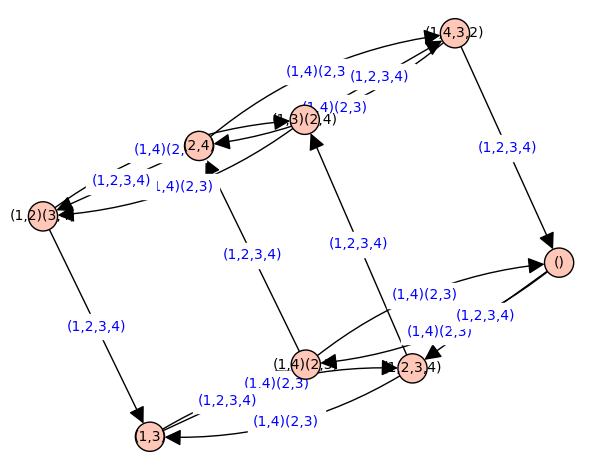

In [55]:
G = DihedralGroup(4)
print("Група D₄, порядок:", G.order())
print("Елементи групи:", G.list())

S = [G.gen(0), G.gen(1)]
print("Генератори S:", S)

C = DiGraph()
C.add_vertices(G.list())

for g in G:
    for s in S:
        C.add_edge(g, g * s, label=str(s))

C.plot(edge_labels=True)


Група Q₈, порядок: 8
Генератори: [(1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6)]


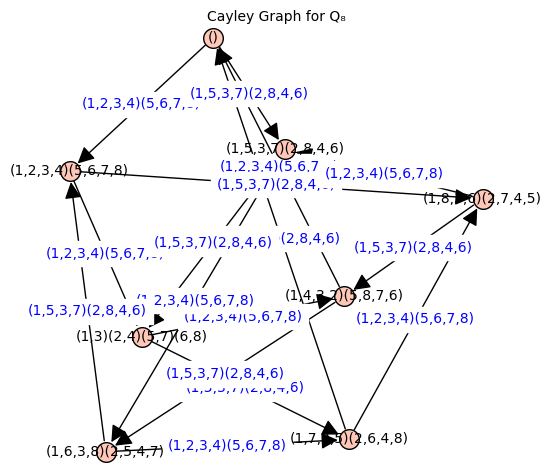

In [56]:
G_Q8 = QuaternionGroup()
S_Q8 = [G_Q8.gen(0), G_Q8.gen(1)]
print("Група Q₈, порядок:", G_Q8.order())
print("Генератори:", S_Q8)

C_Q8 = DiGraph()
C_Q8.add_vertices(G_Q8.list())

for g in G_Q8:
    for s in S_Q8:
        C_Q8.add_edge(g, g * s, label=str(s))

C_Q8.plot(edge_labels=True, title="Cayley Graph for Q₈")


Група S₃, порядок: 6
Генератори: [(1,2,3), (1,2)]


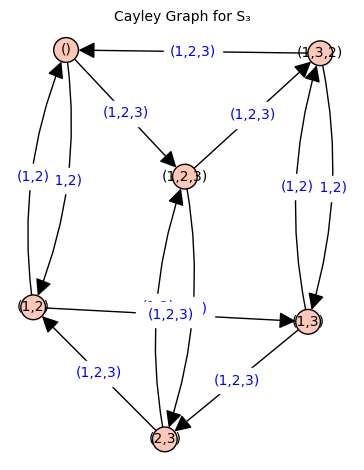

In [57]:
G_S3 = SymmetricGroup(3)
S_S3 = [G_S3.gen(0), G_S3.gen(1)]
print("Група S₃, порядок:", G_S3.order())
print("Генератори:", S_S3)

C_S3 = DiGraph()
C_S3.add_vertices(G_S3.list())

for g in G_S3:
    for s in S_S3:
        C_S3.add_edge(g, g * s, label=str(s))

C_S3.plot(edge_labels=True, title="Cayley Graph for S₃")


Група S₄, порядок: 24
Генератори: [(1,2,3,4), (1,2)]


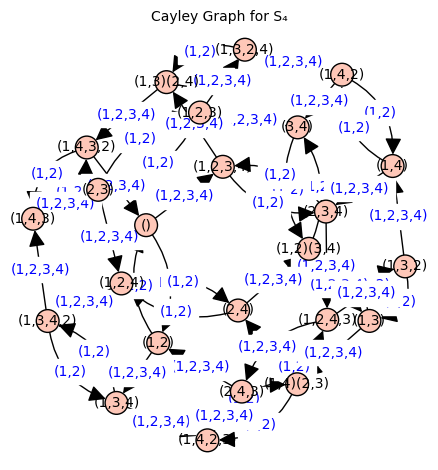

In [58]:
G_S4 = SymmetricGroup(4)
S_S4 = [G_S4.gen(0), G_S4.gen(1)]
print("Група S₄, порядок:", G_S4.order())
print("Генератори:", S_S4)

C_S4 = DiGraph()
C_S4.add_vertices(G_S4.list())

for g in G_S4:
    for s in S_S4:
        C_S4.add_edge(g, g * s, label=str(s))

C_S4.plot(edge_labels=True, title="Cayley Graph for S₄")


Група A₄, порядок: 12
Генератори: [(1,2,3), (2,3,4)]


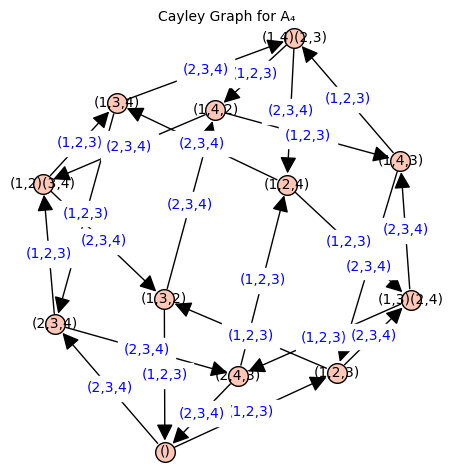

In [59]:
G_A4 = AlternatingGroup(4)
S_A4 = [G_A4.gen(0), G_A4.gen(1)]
print("Група A₄, порядок:", G_A4.order())
print("Генератори:", S_A4)

C_A4 = DiGraph()
C_A4.add_vertices(G_A4.list())

for g in G_A4:
    for s in S_A4:
        C_A4.add_edge(g, g * s, label=str(s))

C_A4.plot(edge_labels=True, title="Cayley Graph for A₄")


---
### 6*. Група підстановок, породжена випадковими підстановками

1. Створіть групи $S_n$ та $A_n$ для великого числа $n$.
2. Проведіть наступний експеримент багато разів (в циклі):<br>
       2.1. Згенеруйте дві випадкові підстановки в $S_n$.<br>
       2.2. Перевірте, парні вони чи ні.<br>
       2.3. Перевірте, чи породжують вони всю групу $S_n$ або її підгрупу $A_n$. 
4. Сформулюйте гіпотезу про те, яка ймовірність породження симетричної групи двома підстановками та що відбувається при $n\rightarrow\infty$.

In [20]:
# Ваш код тут:

---
### 7*. Чи є граф Петерсена графом Келі?

1. Побудуйте граф Петерсена.
2. Перевірте, чи є граф Петерсена графом Келі деякої групи.

In [21]:
# Ваш код тут: